In [3]:
#pip install keras

In [47]:
import tensorflow as tf

In [48]:
tf.__version__

'2.4.1'

In [49]:
from tensorflow.keras.datasets import mnist

In [50]:
(x_train,y_train),(x_test , y_test) = mnist.load_data()
print(y_test)

[7 2 1 ... 4 5 6]


In [51]:
print('training_images_matrix_shape = ', x_train.shape)
print('training_images_matrix_shape = ', y_train.shape)
print('testing_images_matrix_shape = ', x_test.shape)
print('testign_labels_matrix_shape = ', y_test.shape)

training_images_matrix_shape =  (60000, 28, 28)
training_images_matrix_shape =  (60000,)
testing_images_matrix_shape =  (10000, 28, 28)
testign_labels_matrix_shape =  (10000,)


In [52]:
import matplotlib.pyplot as plt

In [53]:
image0 = x_test[5000];
image_label = y_test[5000]

Text(2, 2, '3')

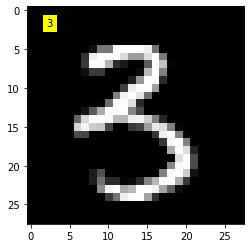

In [54]:
plt.imshow(image0 , cmap='gray')
plt.text(2,2,image_label,bbox=dict(facecolor='yellow'))

In [55]:
x_train = x_train.astype('float32')  # transformer les données en reel
#x_test = x_test.astype('float32')
#print(x_test.shape)

In [56]:
print(y_train)
y_train = tf.one_hot(y_train,depth=10)
#y_test_one_hot = tf.one_hot(y_test,depth=10)
#print(y_test_one_hot.shape)
#we have a result of 10 nerons !? on every nerons we have probability that this is the right answer
#so we have to split our training results on 10 cases so our model knows whats his probabilty means 
#usually the are 5 0 4  so kifech bech yaaref amehi l classe shiha f 10 neuron f sortie ? 
#lzm nbadlouhom 10 column lkol 0 kn l colone elly hachtna beha

[5 0 4 ... 5 6 8]


In [57]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense ,Flatten , Dropout 
from tensorflow.keras import Model , Input
from tensorflow.keras.optimizers import  Adam
#we need to optomize le cout // adam go back and make better filters pour optimizer les filters

In [58]:
#first of all we create our model
model_input =   tf.keras.Input(shape=(28,28,1)) #what is ou model inputs ? 
#defenir first layer of covolution
x = Conv2D(10,(3,3),activation='relu')(model_input)
#we go for max pooling : when we do the max pooling we define the size of our pool 
x = MaxPool2D(pool_size =[2,2],strides=2)(x)
#how many time we do it ? hyper parametres yab

#other layer 
x = Conv2D(100,(4,4),activation='relu')(x)
x = MaxPool2D(pool_size=(2,2),strides=2)(x) #strides = pas 

#flating into one column table
x=Flatten()(x)
x = Dense(100, activation='relu')(x) #1000 NEURON # une seule couche caché
x = Dense(50, activation='relu')(x) 
output = Dense(10 , activation='softmax')(x)


In [59]:
#preparing the structure 
model = Model(model_input,output)

In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 100)       16100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2501

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy']) #metrics : quality

In [62]:
model.fit(x_train,y_train,epochs=10,batch_size=100 , verbose=1) #epochs sont les va et vient dnas la structures
#100 aleatoire pics 

Epoch 1/10
600/600 [==============================] - 11s 18ms/step - loss: 1.6369 - accuracy: 0.7391
Epoch 2/10
600/600 [==============================] - 12s 19ms/step - loss: 0.1526 - accuracy: 0.9556
Epoch 3/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0930 - accuracy: 0.9728
Epoch 4/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0665 - accuracy: 0.9790
Epoch 5/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0319 - accuracy: 0.9904
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 8/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 9/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0220 - accuracy: 0.99250s - loss: 0.0221 - 
Epoch 10/10
600/600 [==============================] - 10s 17m

In [63]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data


ValueError: in user code:

    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1185 test_step
        self.compiled_loss(
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\khali\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print(x_test.shape)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test)
print("predictions shape:", predictions.shape)
print(predictions)

In [ ]:
predicted_categories = tf.argmax(predictions, axis=1) #get the max argument of every table to get an array of one column , why ?
# because we cant compare our input "numbers" with a result of 10 columns

In [ ]:
print(predicted_categories)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(predicted_categories,y_test)

In [ ]:
model.get_weights() #271 MILL PARAMETRES LES BAILS ET LES POIDS